# MED 263 Group 4 Tutorial


This tutorial is hosted at this GitHub Repository: https://github.com/jobapp/Med263-Group4

# Introduction


Genetic mutations are thought to be the main cause of cancer.  These functional changes in protein products result in cancers that may have radically different 
  behaviors in terms of disease progression and therefore treatment options. Genes that are known to be mutated in breast cancers include BRCA1 and 2, TP53, PIK3CA, HER2.<sup>4</sup> Traditionally, breast cancers are categorized into one of four types: Luminal A, Luminal B, HER2E, and Basal (triple negative). These categories are based on the histological appearance, immunostaining, and sometimes mutation profiles of well characterized genes, like those listed above. <sup>1</sup>
  However, there are hundreds of other genes whose role in breast cancer is yet to be fully understood, 
  including those which influence the expression levels of a gene which may otherwise be normal. 
  RNA Seq is a next-generation sequencing (NGS) tool which allows for the quantitative measure of gene expression. 
  This coupled with gene set enrichment analysis can allow for physicians and researchers to better understand the complexities within patients’ 
  cancer and lead to more effective therapies.
    
  In this exercise, we will be looking at a breast cancer data set from TCGA (BRCA cohort) consisting of 1097 different patients that have had their gene expression
  quantified with RNAseq and their somatic mutation profile assessed by NGS.<sup>2</sup>  We will be performing dimensionality reduction via non-negative matrix factorization (NMF) 
  in order to reduce the complex TCGA dataset to two |W| x |H|, for genes and patient ID, respectively. Patients were then reorganized into a z-normalized, 
  hierarchically-clustered heatmap, with 11 clusters identified with 1 to 465 patients per group. Kaplan-Meier curves comparing survivability of various clusters. 
  was then performed. We will be using the patients’ RNAseq expression as a readout for cancer type to cluster them into functional groups.  
 The resulting groups of this unsupervised clustering will then be annotated using ssGSEA (single sample GSEA) in order to assign biological meaning 
 to the different groups of samples.<sup>3</sup>  We will also be examining which specific mutations are more associated with certain groups to determine the “root cause” 
  of the observed cancer expression pattern. 
  
# Biological/clinical interpretation of analysis results
Several of the clusters formed during the analysis correlate highly, through ssGSEA-based annotation, with the four traditional means of categorizing breast tumors (Luminal A, Luminal B, Basal, HER2+).  This project would allow researchers to subset the traditional categories in order to identify additional treatment targets which could be used in conjunction with available treatments, and also allow for a more accurate prognosis assessment. 

# Mathematical/statistical meaning of analysis
Clusters were biologically annotated using one-vs-all (cluster of interest vs samples not in the cluster) comparisons of their ssGSEA scores, statistically qantified using the Mann-Whitney test.  In clusters 1 through 5 in the tutorial, the gene set corresponding with the breast cancer subtype (Luminal A, Luminal B, HER2E, and Basal \[triple negative\]) was the one with the lowest p-value for the cluster, even after multiple intra-group multiple hypothesis correction.  Kaplan-Meier plots were also generated to examine differences in survival over time in the different clusters.  Pairwise differences between the survival curves of the different group were statistically quantified with the Cox Log-Rank test.  After multiple hypothesis correction, ```Cluster 2: Luminal A``` and ```Cluster 5: ERBB2-driven``` were the only pair of meaningful clusters with a statistically significant difference (p = 0.046) in survival, meaning they had a reasonable amount of patients (Cluster 9 only had 1 patient and was likely due to noise).  The ERBB2 (HER2) cluster had a lower median survival time of 3063 days than the Luminal A cluster, which had 3926 days, replicating a clinically known fact <sup>1</sup>.  In multiple hypothesis testing, p-values were corrected using the Benjamini-Hochberg False Discovery Rate (FDR) procedure as implemented in the ```fdrcorrection``` function of the ```statsmodel``` package.

# Common pitfalls and how to avoid them 
1. Be sure to add the clinical and gene expression data files into your data directory:

    Clinical Data: https://docs.google.com/spreadsheets/d/1dpBjMe0RNiGxcJWYNHcMOBDDSTGDzQJmNq8C_4Bd_4E/edit?usp=sharing
    
    Expression Data: https://drive.google.com/file/d/1MU4dM7mpBTy933Nx5jNAzVZ8y1EaZ7T0/view?usp=sharing
    
    Gene Sets (Already in this repository in the data directory): https://drive.google.com/file/d/1-BA3hxGLmQhFs77b8Hno9N4_FuEUXLIW/view?usp=sharing

2. While Clustering, be sure to not set the height threshold too low since this will generate many clusters due to all the dendrogram lines it will intersect with.  The code will take an incredibly long time to run, may crash some computers, and may not return useful clusters since there will be fewer samples per cluster. To avoid this, you can start with a higher threshold and decrease until you are satisfied with the results. 
 
3. If you are working on a separate problem using NMF_decomposition, setting a random state is important for reproducibility. 

4. Make sure you take time to explore the data you are given since it might not be in a form that is suitable for analysis, or that your code can use.  See **Step 1: Data Cleanup**.
5. Always make sure you do multiple hypothesis corrections when testing multiple hypotheses because if everything is "significant", then nothing is.  

# Step 0: Download Software and Data

This tutorial uses Python 3 and the Jupyter notebook environment. You may already have these on your system.

Install Python 3: https://www.python.org/downloads/

You may have to install pip separately on some systems.

Then install Jupyter Notebook: https://jupyter.org/install

Test if your install was successful by opening a terminal and running one of these:
```python3 -m notebook```

```py -3.X -m notebook```

X = your version of python, for sample Python X = 7 for Python 3.7

```jupyter notebook```

## Python Packages:
### Pandas
  [Pandas](https://pandas.pydata.org/) is a data analytics tool built on python which we will use to import, visualize and clean our data. 
### NumPy
  [NumPy](https://scipy.org/install/) is a mathematical library optimized for very fast calculations.
### SciPy
  [SciPy](https://scipy.org/install/) is a scientific computing library that we use for hierarchical clustering.  
### MatplotLib
  [MatplotLib](https://matplotlib.org/stable/users/installing/index.html) is a library for plotting graphs and other basic visualization functionality. 
### Seaborn 
 [Seaborn](https://seaborn.pydata.org/) is what we will use to visualize our data. 
### Lifelines
  [Lifelines](https://github.com/CamDavidsonPilon/lifelines/) is a survival analysis library used to create Kaplan-Meier survival plots. 

  
### sklearn
  [ScikitLearn](https://scikit-learn.org/stable/install.html) is a machine learning library.  Here we use it to perform Non-Negative Matrix Factorization (NMF).
### StatsModels
  [statsmodels](https://www.statsmodels.org/dev/install.html) is a statistical package for doing a variety of data analysis and statistics.  Here it is used for False Discovery Rate (FDR) p-value correction.  
  
All of the above packages can be installed with pip, anaconda, or whatever other package/environment manager you prefer.  You may already have some or all of these installed.  Pip commands are given here:
```
pip install -U pandas numpy scipy matplotlib seaborn lifelines scikit-learn statsmodels
```

In [1]:
import pandas as pd
import seaborn as sns

from scipy.spatial import distance
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster,cut_tree,set_link_color_palette
from scipy.stats import mannwhitneyu,norm,sem

import sklearn.decomposition
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from matplotlib import cm,colors
import itertools

from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import sys
from ssGSEA import single_sample_gseas

from statsmodels.stats.multitest import fdrcorrection
import numpy as np

If the above import commands do not result in an error, then your installs were successful.  This was also the first piece of code needed for the tutorial.


## Data:
Data for this tutorial comes from the Breast Cancer (BRCA) Cohort of [The Cancer Genome Atlas](https://portal.gdc.cancer.gov/projects/TCGA-BRCA).

Clinical Data: https://docs.google.com/spreadsheets/d/1dpBjMe0RNiGxcJWYNHcMOBDDSTGDzQJmNq8C_4Bd_4E/edit?usp=sharing

Expression Data: https://drive.google.com/file/d/1MU4dM7mpBTy933Nx5jNAzVZ8y1EaZ7T0/view?usp=sharing

Gene Sets (Already in this repository in the [data directory](data/MSigDB_breast_cancer_subtypes_gene_sets.gmt)): https://drive.google.com/file/d/1-BA3hxGLmQhFs77b8Hno9N4_FuEUXLIW/view?usp=sharing

Place all downloaded data into the [data directory](data/).  

# Step 1: Data Cleanup
  
  
First we will want to import the gene expression for each patient as a pandas dataframe.

In [2]:
expression_df = pd.read_table("./data/TCGA_BRCA_EXP.v1.gct",index_col=0,skiprows=2)
expression_df = expression_df[[c for c in expression_df.columns if c !="Description"]]
expression_df = expression_df.rename(columns={c:c.replace("_","-") for c in expression_df.columns})
expression_df.head()

,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,TCGA-5T-A9QA,TCGA-A1-A0SB,TCGA-A1-A0SD,...,TCGA-UL-AAZ6,TCGA-UU-A93S,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-WT-AB41,TCGA-WT-AB44,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6
Name,,,,,,,,,,,,,,,,,,,,,
A1BG,197.090,237.3840,423.2370,191.0180,268.8810,203.7720,211.296,314.184,49.1992,142.2980,...,44.1541,321.975,1032.0600,533.0380,119.8110,471.2850,223.2200,255.1350,439.5430,248.3270
A1CF,0.000,0.0000,0.9066,0.0000,0.4255,0.0000,0.000,0.523,0.0000,0.0000,...,0.3992,0.000,0.0000,0.4746,0.0000,0.0000,0.0000,2.3618,0.0000,0.0000
A2BP1,0.000,0.0000,0.0000,0.0000,3.8298,0.5866,0.000,0.523,4.5050,0.3308,...,0.0000,0.000,0.6158,5.2207,4.7319,0.0000,0.3937,1.4171,0.5973,0.0000
A2LD1,102.963,70.8646,161.2600,62.5072,154.3700,111.5350,101.972,233.619,37.8962,66.8630,...,188.8610,225.094,125.1810,59.7152,312.0580,61.7308,131.2280,79.9291,81.3010,25.1866
A2M,5798.370,7571.9800,8840.4000,10960.2000,9585.4400,12331.3000,15406.600,3182.480,31626.9000,23793.5000,...,4644.0500,3530.380,8051.5200,18325.0000,9580.9700,5409.3100,20348.8000,17094.8000,36838.5000,7339.1700


Next, we can import the patient's clininically relevant data into a seperate pandas table


In [3]:
clinical_info_df = pd.read_csv("./data/TCGA_BRCA_clinical_FH.csv",index_col=0)
clinical_info_df.head()

,Breslow_thickness,acronym,age_at_diagnosis,age_began_smoking_in_years,cause_of_death,cervical_carcinoma_pelvic_extension_text,cervix_suv_results,chemo_concurrent_type,clinical_stage,corpus_involvement,...,tobacco_smoking_year_stopped,tool,tumor_size,tumor_stage,tumor_status,tumor_tissue_site,vital_status,weight_kg_at_diagnosis,year_of_tobacco_smoking_onset,years_to_birth
TCGA-3C-AAAU,NaN,BRCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,clinical_pick_tier_1,NaN,NaN,NaN,breast,Alive,NaN,NaN,55.0
TCGA-3C-AALI,NaN,BRCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,clinical_pick_tier_1,NaN,NaN,NaN,breast,Alive,NaN,NaN,50.0
TCGA-3C-AALJ,NaN,BRCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,clinical_pick_tier_1,NaN,NaN,NaN,breast,Alive,NaN,NaN,62.0
TCGA-3C-AALK,NaN,BRCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,clinical_pick_tier_1,NaN,NaN,NaN,breast,Alive,NaN,NaN,52.0
TCGA-4H-AAAK,NaN,BRCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,clinical_pick_tier_1,NaN,NaN,NaN,breast,Alive,NaN,NaN,50.0


TCGA data was collected from many different institutions ("sites") nationwide, and each has slightly different ways to record clinical data.  This results in a very "scattered" data table.  For example, you can see here that the time of event stored in two different columns depending on whether the patient is dead or alive.  There are also patients who have timepoint values recorded in both, or the wrong column, so you cannot just "pick one" or else you will lose info.

In [4]:
df = clinical_info_df[["days_to_last_followup",'days_to_death', 'vital_status']] 
df.loc[df["vital_status"]=="Dead"].head()

,days_to_last_followup,days_to_death,vital_status
TCGA-A1-A0SK,[Not Available],967,Dead
TCGA-A2-A04P,[Not Available],548,Dead
TCGA-A2-A04V,[Not Available],1920,Dead
TCGA-A2-A0CM,[Not Available],754,Dead
TCGA-A2-A0CO,3409,3492,Dead


This code below "regularizes" the timepoint data into one column by choosing the approrpiate column depending on the patient's vital status (Dead/Alive).  

In [5]:
df["days_to_last_followup"] = pd.to_numeric(df["days_to_last_followup"],errors="coerce")
df["days_to_death"] = pd.to_numeric(df["days_to_death"],errors="coerce")

vital_status_df_dict = {"sample":[],"event_time":[],"vital_status":[]}
for index,row in df.iterrows():
    timepoint = 0
    if row["vital_status"] =="Alive":
        if row.isnull()["days_to_last_followup"]==False:
            vital_status_df_dict["sample"].append(index)
            vital_status_df_dict["event_time"].append(row["days_to_last_followup"])
            vital_status_df_dict["vital_status"].append(row["vital_status"])
        elif row.isnull()["days_to_death"]==False:
            vital_status_df_dict["sample"].append(index)
            vital_status_df_dict["event_time"].append(row["days_to_death"])
            vital_status_df_dict["vital_status"].append(row["vital_status"])
    elif row["vital_status"] =="Dead":
        if row.isnull()["days_to_death"]==False:
            vital_status_df_dict["sample"].append(index)
            vital_status_df_dict["event_time"].append(row["days_to_death"])
            vital_status_df_dict["vital_status"].append(row["vital_status"])
        elif row.isnull()["days_to_last_followup"]==False:
            vital_status_df_dict["sample"].append(index)
            vital_status_df_dict["event_time"].append(row["days_to_last_followup"])
            vital_status_df_dict["vital_status"].append(row["vital_status"])
vital_status_df = pd.DataFrame(vital_status_df_dict).set_index("sample")
vital_status_df

C:\Users\computer\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\computer\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_time,vital_status
sample,,
TCGA-3C-AAAU,4047.0,Alive
TCGA-3C-AALI,4005.0,Alive
TCGA-3C-AALJ,1474.0,Alive
TCGA-3C-AALK,1448.0,Alive
TCGA-4H-AAAK,348.0,Alive
TCGA-5L-AAT0,1477.0,Alive
TCGA-5L-AAT1,1471.0,Alive
TCGA-5T-A9QA,303.0,Alive
TCGA-A1-A0SB,259.0,Alive


The data is now cleaned, even for dead patients:

In [6]:
vital_status_df.loc[vital_status_df["vital_status"]=="Dead"]

,event_time,vital_status
sample,,
TCGA-A1-A0SK,967.0,Dead
TCGA-A2-A04P,548.0,Dead
TCGA-A2-A04V,1920.0,Dead
TCGA-A2-A0CM,754.0,Dead
TCGA-A2-A0CO,3492.0,Dead
TCGA-A2-A0CS,2348.0,Dead
TCGA-A2-A0CU,158.0,Dead
TCGA-A2-A0EW,1884.0,Dead
TCGA-A2-A0SV,825.0,Dead


# Step 2: Dimensionality Reduction
Dimensionality Reduction is a means of transforming highly dimensional data (like TCGA data) to a lower dimension data set, or matrix, that can more easily be analyzed. The method we will be using is Non-Negative Matrix Factorization (NMF) which will transform/approximate our original dataset |V| into two matrices,|W| and |H|, such that **W x H = V** plus an error matrix that is not used. We will also z-normalize the outputted matrices so that we can more easily interpret and visualize the data.
  
This code creates the NMF decomposition and z-normalize functions.

In [7]:
def NMF_decomposition(data,n_comp,max_iter=1000):
    model = sklearn.decomposition.NMF(n_components = n_comp,
                                      init = 'nndsvdar',
                                      solver = 'cd',
                                      max_iter = max_iter,
                                      tol = 1e-10,
                                      random_state = 12345, shuffle = False, verbose = False)
    w = pd.DataFrame(model.fit_transform(data + 0.001), index = data.index, columns = ['F{}'.format(x) for x in range(n_comp)])
    h = pd.DataFrame(model.components_, index = ['F{}'.format(x) for x in range(n_comp)], columns = data.columns)
    return w,h

def z_normalize_group(exp_df_in,do_clip = False,do_shift = False,do_rank = False):
    exp_df_in_norm = exp_df_in.copy()
    exp_df_in_norm = exp_df_in_norm[~exp_df_in_norm.index.duplicated(keep='first')]
    if do_rank==True:
        exp_df_in_norm = exp_df_in_norm.rank(axis=0, method='average', numeric_only=None, na_option='keep', ascending=True, pct=False)
    exp_df_in_means = exp_df_in_norm.mean(axis=1)
    exp_df_in_stds = exp_df_in_norm.std(axis=1)
    for i in exp_df_in_norm.index:
        #print(exp_df_in_norm.loc[i,:])
        exp_df_in_norm.loc[i,:] = (exp_df_in_norm.loc[i,:] - exp_df_in_means.loc[i])/exp_df_in_stds.loc[i]
    if do_clip==True:
        exp_df_in_norm.clip(-2, 2, inplace=True) 
    if do_shift==True:
        exp_df_in_norm = exp_df_in_norm + 2
    return exp_df_in_norm

Here we'll rank normalize the expression data and perform dimensionality reduction using the functions created above. 


In [8]:
normalized_expression_df = expression_df.rank(axis=0, method='dense', numeric_only=None, na_option='keep', 
                           ascending=True, pct=False)
W_df,H_df = NMF_decomposition(normalized_expression_df,10,max_iter=1000)


We can plot heatmaps of the resulting W and H using seaborn where W contains patient sample ID, and H contains the gene expression data.

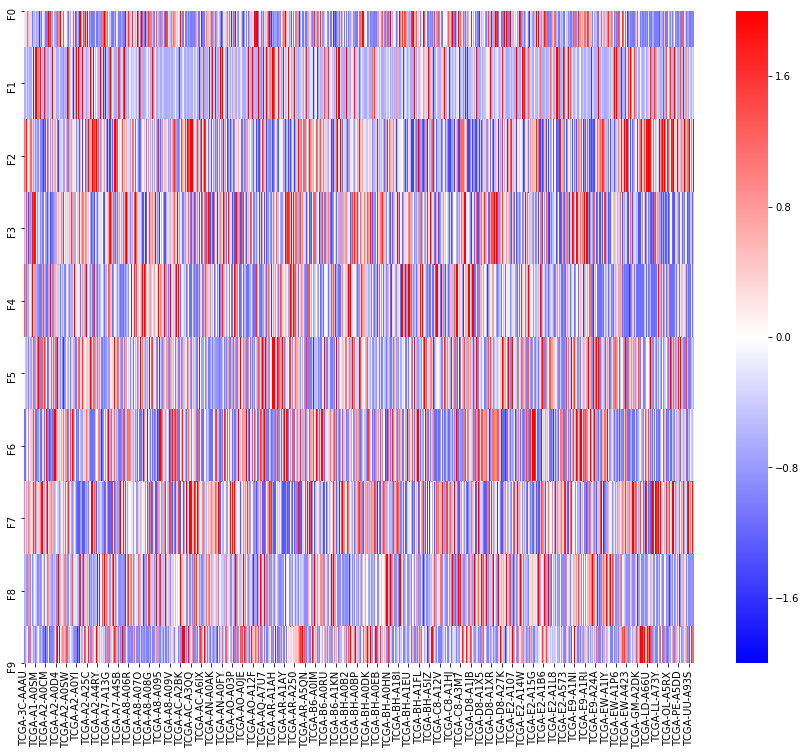

In [9]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(z_normalize_group(H_df),cmap="bwr",vmin=-2,vmax=2,center=0)
plt.show()

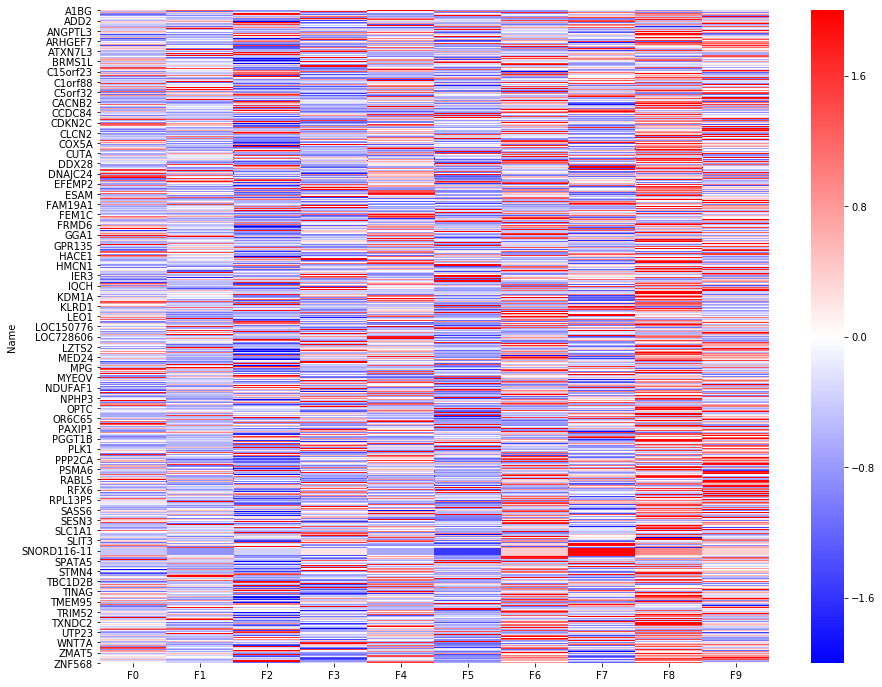

In [10]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(z_normalize_group(W_df),cmap="bwr",vmin=-2,vmax=2,center=0)
plt.show()

# Step 3: Cluster

In [11]:
W_row_linkage_obj = linkage(distance.pdist(W_df), method='average')
W_col_linkage_obj = linkage(distance.pdist(W_df.T), method='average')

H_row_linkage_obj = linkage(distance.pdist(H_df), method='average')
H_col_linkage_obj = linkage(distance.pdist(H_df.T), method='average')

Cluster of genes (**W**):


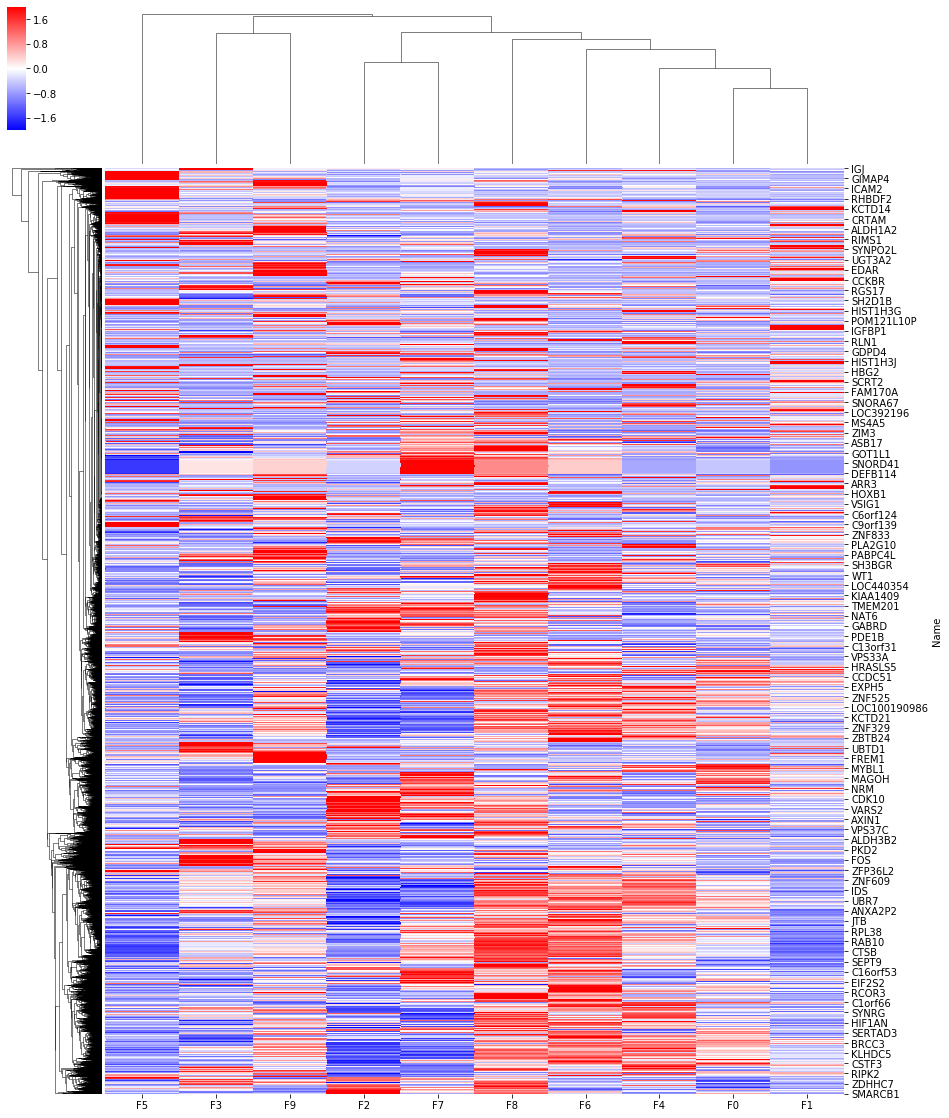

In [12]:
sns.clustermap(W_df,
               row_linkage=W_row_linkage_obj,
               col_linkage = W_col_linkage_obj,
               figsize=(15,20),
               #square=True,
               z_score=0,
               center=0,
               vmin=-2,
               vmax=2,
               cmap="bwr"
              )

Cluster of Patients (**H**):

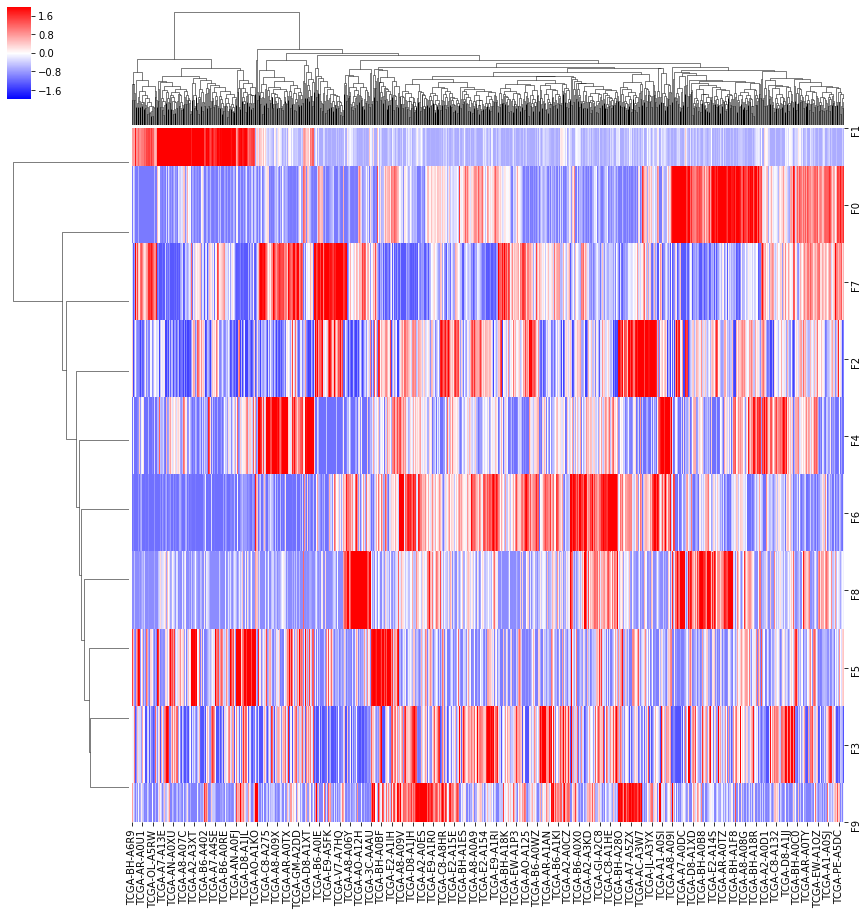

In [13]:
sns.clustermap(H_df,
               row_linkage=H_row_linkage_obj,
               col_linkage = H_col_linkage_obj,
               figsize=(15,15),
               #square=True,
               z_score=0,
               center=0,
               vmin=-2,
               vmax=2,
               cmap="bwr"
              )

Now that we have clusters, it is always nice to visualize them using color:
This step is also necessary to make sure future plots of multiple clusters have the same color/cluster assignments as this first dendrogram.

In [14]:
colormap_hex = []
colormap_obj = cm.get_cmap('Paired')
for i in range(0,colormap_obj.N):
    colormap_hex.append(colors.rgb2hex(colormap_obj(i)))
colormap_hex

['#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b15928']

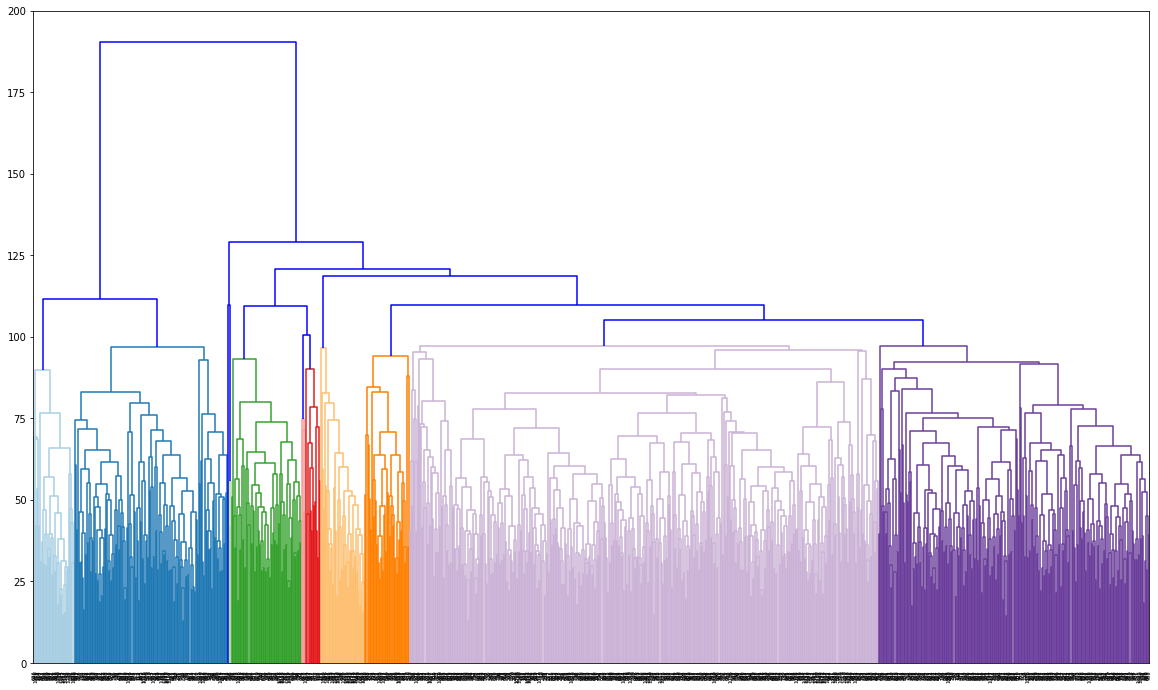

In [15]:
height_threshold = 100
plt.figure(figsize=(20, 12))
set_link_color_palette(colormap_hex)


#f, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(15,12), constrained_layout=True)
dendrogram_dict = dendrogram(H_col_linkage_obj,
                             orientation='top',
                             #labels=cluster_assignments_series.index,
                             distance_sort='descending',
                             color_threshold = height_threshold,
                             #link_color_func={i:color_palette_lst[i] for i in range(0,len(color_palette_lst))},
                             show_leaf_counts= False,
                             #ax=ax1
                            )
#ax2.imshow([cluster_assignments_series.iloc[dendrogram_dict["leaves"]].values]*100, cmap='Set2', interpolation='nearest')
plt.show()

Now that we have nice clusters, we can create a dataframe, assigning each patient to a cluster for further analysis:

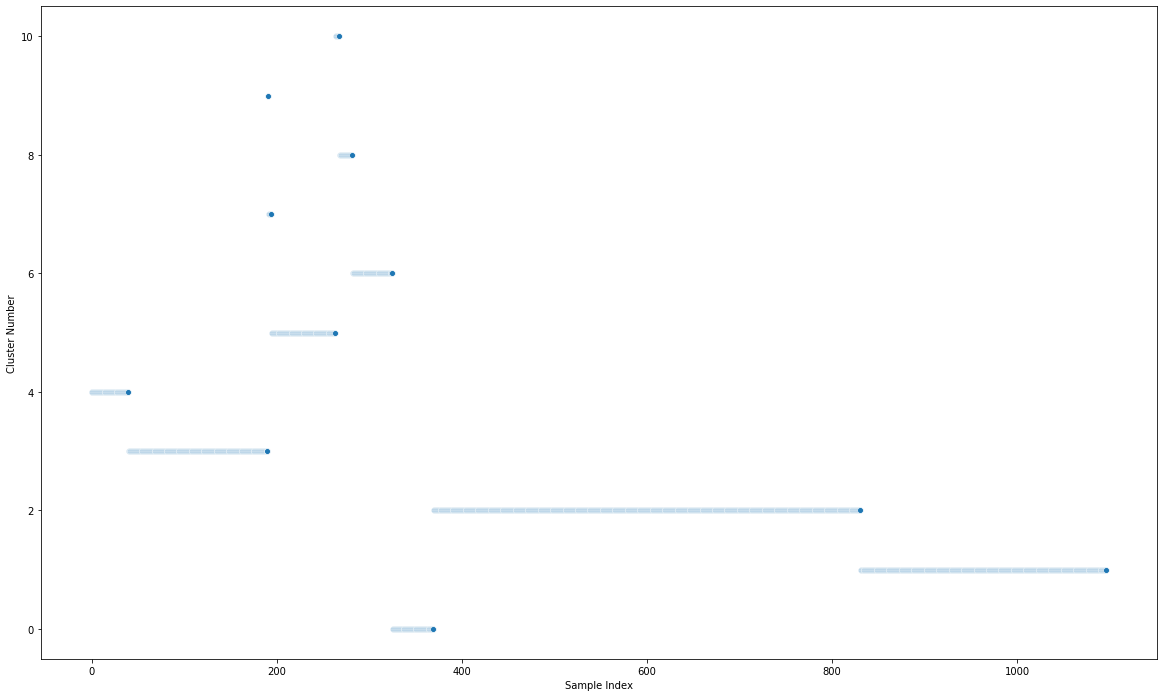

In [16]:
cluter_assignments_arr = cut_tree(H_col_linkage_obj,height=height_threshold).flatten()[dendrogram_dict["leaves"]]
plt.figure(figsize=(20, 12))
sns.scatterplot(x=range(0,len(cluter_assignments_arr)),y=cluter_assignments_arr)
plt.xlabel("Sample Index")
plt.ylabel("Cluster Number")
plt.show()

Make sure the dataframe is good:

In [17]:
cluster_assignments_dict = {"sample":pd.Series(H_df.columns).iloc[dendrogram_dict["leaves"]].values,
                            "cluster":cluter_assignments_arr}
cluster_assignments_series = pd.DataFrame(cluster_assignments_dict).set_index("sample")["cluster"]
cluster_assignments_series = cluster_assignments_series
cluster_assignments_series.head()

sample
TCGA-BH-A6R9    4
TCGA-EW-A1P7    4
TCGA-S3-AA15    4
TCGA-E2-A1AZ    4
TCGA-A2-A4RX    4
Name: cluster, dtype: int32

How many patients are in each cluster?

In [18]:
cluster_assignments_series.value_counts()

2     461
1     266
3     151
5      69
6      44
0      44
4      40
8      14
10      4
7       3
9       1
Name: cluster, dtype: int64

# Step 4: Annotate Clusters of Patients

In [20]:
from pandas import DataFrame


def read_gmt(gmt_file_path, drop_description=True):

    lines = []

    with open(gmt_file_path) as gmt_file:

        for line in gmt_file:

            split = line.strip().split(sep="\t")

            lines.append(split[:2] + [gene for gene in set(split[2:]) if gene])

    df = DataFrame(lines)

    df.set_index(0, inplace=True)

    df.index.name = "Gene Set"

    if drop_description:

        df.drop(1, axis=1, inplace=True)

        df.columns = tuple("Gene {}".format(i) for i in range(0, df.shape[1]))

    else:

        df.columns = ("Description",) + tuple(
            "Gene {}".format(i) for i in range(0, df.shape[1] - 1)
        )

    return df

from pandas import concat



def read_gmts(gmt_file_paths, sets=None, drop_description=True, collapse=False):

    dfs = []

    for gmt_file_path in gmt_file_paths:

        dfs.append(read_gmt(gmt_file_path, drop_description=drop_description))

    df = concat(dfs, sort=True)

    if sets is not None:

        df = df.loc[(df.index & sets)].dropna(axis=1, how="all")

    if collapse:

        return df.unstack().dropna().sort_values().unique()

    else:

        return df
    

Perform single sample Gene Set Enrichment Analysis (ssGSEA):
This tells how overexpressed certain gene sets are within each individual patient's sample.  The 12 gene sets chosen represent different breast cancer subtypes, though many others are available on MSigDB for pathways and other biological phenomena.

In [21]:
MSigDB_breast_cancer_subtypes_gene_sets_df = read_gmt("./data/MSigDB_breast_cancer_subtypes_gene_sets.gmt")
MSigDB_breast_cancer_subtypes_gene_sets_df

,Gene 0,Gene 1,Gene 2,Gene 3,Gene 4,Gene 5,Gene 6,Gene 7,Gene 8,Gene 9,...,Gene 637,Gene 638,Gene 639,Gene 640,Gene 641,Gene 642,Gene 643,Gene 644,Gene 645,Gene 646
Gene Set,,,,,,,,,,,,,,,,,,,,,
VANTVEER_BREAST_CANCER_ESR1_UP,FAAH,CCDC74B,FAM179B,MAN2B2,ABAT,PCSK6,ELOVL5,TCEAL1,BHLHE40,PEX19,...,None,None,None,None,None,None,None,None,None,None
VANTVEER_BREAST_CANCER_METASTASIS_UP,RTN4RL1,TBX3,METTL12,PDIA4,KIAA1324,WISP1,ACADS,CCDC74B,MATN3,FUT8,...,None,None,None,None,None,None,None,None,None,None
VANTVEER_BREAST_CANCER_POOR_PROGNOSIS,NMU,RTN4RL1,CDC42BPA,WISP1,MTDH,FLT1,ECI2,NDC80,BBC3,ESM1,...,None,None,None,None,None,None,None,None,None,None
BIOCARTA_HER2_PATHWAY,PIK3CA,STAT3,MAP2K1,SHC1,SOS1,ESR1,IL6R,EGFR,CARM1,HRAS,...,None,None,None,None,None,None,None,None,None,None
CHARAFE_BREAST_CANCER_BASAL_VS_MESENCHYMAL_UP,PRRG4,ELF3,TLCD1,ESRP2,SPINT2,PRR15L,KIAA0247,KLK6,SCNN1A,CDS1,...,None,None,None,None,None,None,None,None,None,None
CHARAFE_BREAST_CANCER_LUMINAL_VS_BASAL_UP,BAI2,C7orf26,PATZ1,TSPAN15,PCBP2,PRR14,TFF3,SRRM2,SECISBP2,CYB561,...,None,None,None,None,None,None,None,None,None,None
SMID_BREAST_CANCER_BASAL_UP,DCPS,BBOX1,HEPH,PFKP,MAGEA6,PLCB4,LAMP3,CRYAB,UBE2E3,CDC20,...,RASA2,RASAL1,GPSM2,IFRD1,TYMS,COL11A2,EDN1,RUNX3,ITGA6,KCNN4
SMID_BREAST_CANCER_ERBB2_UP,GOT1,ABCC3,SRPK3,GGT1,ABCA12,SERHL2,IL13RA1,NOL3,KIAA0182,SCNN1A,...,None,None,None,None,None,None,None,None,None,None
SMID_BREAST_CANCER_LUMINAL_A_UP,ATRNL1,OGN,CIDEC,PTHLH,HLF,LIPE,PPARG,IGF1,PLIN1,PGR,...,None,None,None,None,None,None,None,None,None,None


The cell below does the actual ssGSEA calculation.  It may take some time to run.  

In [22]:
TCGA_breast_ssGSEA_df = single_sample_gseas(expression_df,
                                            MSigDB_breast_cancer_subtypes_gene_sets_df,
                                            n_job=4) #change n_job to whatever the number of cores you have on your computer
#TCGA_breast_ssGSEA_df.to_csv("./data/TCGA_breast_ssGSEA_scores.csv")

In [23]:
TCGA_breast_ssGSEA_df

,TCGA-3C-AAAU,TCGA-3C-AALI,TCGA-3C-AALJ,TCGA-3C-AALK,TCGA-4H-AAAK,TCGA-5L-AAT0,TCGA-5L-AAT1,TCGA-5T-A9QA,TCGA-A1-A0SB,TCGA-A1-A0SD,...,TCGA-UL-AAZ6,TCGA-UU-A93S,TCGA-V7-A7HQ,TCGA-W8-A86G,TCGA-WT-AB41,TCGA-WT-AB44,TCGA-XX-A899,TCGA-XX-A89A,TCGA-Z7-A8R5,TCGA-Z7-A8R6
Gene Set,,,,,,,,,,,,,,,,,,,,,
VANTVEER_BREAST_CANCER_ESR1_UP,0.797,0.734,0.759,0.780,0.770,0.785,0.735,0.780,0.653,0.815,...,0.769,0.700,0.810,0.785,0.778,0.756,0.731,0.725,0.738,0.782
VANTVEER_BREAST_CANCER_METASTASIS_UP,0.767,0.773,0.778,0.808,0.785,0.812,0.789,0.805,0.785,0.814,...,0.783,0.778,0.839,0.787,0.801,0.809,0.786,0.762,0.779,0.793
VANTVEER_BREAST_CANCER_POOR_PROGNOSIS,0.626,0.616,0.623,0.688,0.887,0.684,0.665,0.639,0.762,0.687,...,0.604,0.611,0.713,0.602,0.682,0.645,0.675,0.666,0.585,0.661
BIOCARTA_HER2_PATHWAY,0.780,0.793,0.716,0.756,0.765,0.766,0.738,0.759,0.751,0.807,...,0.723,0.715,0.773,0.760,0.750,0.713,0.749,0.799,0.747,0.786
CHARAFE_BREAST_CANCER_BASAL_VS_MESENCHYMAL_UP,0.701,0.724,0.708,0.723,0.697,0.676,0.688,0.729,0.769,0.759,...,0.742,0.770,0.754,0.737,0.709,0.740,0.667,0.694,0.759,0.710
CHARAFE_BREAST_CANCER_LUMINAL_VS_BASAL_UP,0.726,0.726,0.716,0.736,0.705,0.722,0.698,0.755,0.635,0.719,...,0.734,0.674,0.760,0.713,0.728,0.717,0.679,0.679,0.655,0.739
SMID_BREAST_CANCER_BASAL_UP,0.596,0.582,0.598,0.619,0.617,0.611,0.603,0.628,0.761,0.611,...,0.631,0.715,0.625,0.632,0.599,0.656,0.615,0.603,0.704,0.619
SMID_BREAST_CANCER_ERBB2_UP,0.752,0.855,0.763,0.806,0.752,0.711,0.750,0.795,0.707,0.772,...,0.860,0.894,0.727,0.798,0.708,0.734,0.783,0.741,0.735,0.724
SMID_BREAST_CANCER_LUMINAL_A_UP,0.616,0.511,0.619,0.715,0.793,0.762,0.633,0.720,0.637,0.708,...,0.847,0.635,0.790,0.766,0.692,0.686,0.737,0.773,0.697,0.763


In [24]:
## 1 vs all mann whitneys + distribution charts
def mann_whitney_cluster_1_vs_others(cluster,cluster_assignment_series, data_df):
    cluster_samples = cluster_assignment_series.loc[cluster_assignment_series==cluster].index
    other_samples = cluster_assignment_series.loc[cluster_assignment_series!=cluster].index
    results_df_dict = {"gene_set":[],
                       "cluster_avg":[],
                       "cluster_95%_CI_lower":[],
                       "cluster_95%_CI_upper":[],
                       "others_avg":[],
                       "others_95%_CI_lower":[],
                       "others_95%_CI_upper":[],
                       "mann-whitney_p-value":[]}
    for index,row in data_df.iterrows():
        cluster_data = row[cluster_samples].dropna()
        other_data = row[other_samples].dropna()
        cluster_data_mean = cluster_data.mean()
        cluster_data_95_CI = norm.interval(alpha=0.95, loc=cluster_data_mean, scale=sem(cluster_data))
        other_data_mean = other_data.mean()
        other_data_95_CI = norm.interval(alpha=0.95, loc=other_data_mean, scale=sem(other_data))
        mann_whitney_result = mannwhitneyu(cluster_data,other_data)
        mann_whitney_pval =  mann_whitney_result.pvalue
        results_df_dict["gene_set"].append(index)
        results_df_dict["cluster_avg"].append(cluster_data_mean)
        results_df_dict["cluster_95%_CI_lower"].append(cluster_data_95_CI[0])
        results_df_dict["cluster_95%_CI_upper"].append(cluster_data_95_CI[1])
        results_df_dict["others_avg"].append(other_data_mean)
        results_df_dict["others_95%_CI_lower"].append(other_data_95_CI[0])
        results_df_dict["others_95%_CI_upper"].append(other_data_95_CI[1])
        results_df_dict["mann-whitney_p-value"].append(mann_whitney_pval)
    results_df = pd.DataFrame(results_df_dict).set_index("gene_set")
    results_df["group_FDR_corrected_p-value"] = fdrcorrection(results_df_dict["mann-whitney_p-value"])[1]
    results_df["group_avg_diff"] = results_df["cluster_avg"]-results_df["others_avg"]
    
    return results_df.sort_values(by="group_avg_diff",ascending=False)

Statistics on the ssGSEA score distributions for each cluster can be displayed.  Which gene sets, when ordered by the difference between the average group of interest and others rises to the top?  Do they cover the main described subtypes of breast cancer?  

In [25]:
cluster_1_results_df = mann_whitney_cluster_1_vs_others(1,cluster_assignments_series, TCGA_breast_ssGSEA_df)
cluster_1_results_df

,cluster_avg,cluster_95%_CI_lower,cluster_95%_CI_upper,others_avg,others_95%_CI_lower,others_95%_CI_upper,mann-whitney_p-value,group_FDR_corrected_p-value,group_avg_diff
gene_set,,,,,,,,,
SMID_BREAST_CANCER_LUMINAL_B_UP,0.776654,0.770879,0.782429,0.695605,0.688254,0.702957,3.176803e-30,1.906082e-29,0.081049
VANTVEER_BREAST_CANCER_ESR1_UP,0.789605,0.785899,0.793312,0.735907,0.730373,0.741442,6.833185e-20,2.733274e-19,0.053698
DOANE_BREAST_CANCER_ESR1_UP,0.819564,0.815403,0.823725,0.769526,0.762347,0.776705,2.267145e-07,3.022860e-07,0.050038
CHARAFE_BREAST_CANCER_LUMINAL_VS_BASAL_UP,0.730741,0.727899,0.733582,0.690788,0.687520,0.694056,2.648443e-35,3.178131e-34,0.039952
SMID_BREAST_CANCER_LUMINAL_A_UP,0.727970,0.719077,0.736863,0.689214,0.681971,0.696457,7.005126e-05,7.641956e-05,0.038756
VANTVEER_BREAST_CANCER_METASTASIS_UP,0.790000,0.786233,0.793767,0.769924,0.766647,0.773201,4.032648e-08,6.913111e-08,0.020076
BIOCARTA_HER2_PATHWAY,0.785695,0.781547,0.789844,0.768087,0.765325,0.770848,1.608954e-10,3.861490e-10,0.017609
SMID_BREAST_CANCER_ERBB2_UP,0.778391,0.773951,0.782831,0.764753,0.761459,0.768047,8.741091e-08,1.311164e-07,0.013638
VANTVEER_BREAST_CANCER_POOR_PROGNOSIS,0.691500,0.683094,0.699906,0.679593,0.674515,0.684672,3.020176e-03,3.020176e-03,0.011907


In [26]:
cluster_2_results_df = mann_whitney_cluster_1_vs_others(2,cluster_assignments_series, TCGA_breast_ssGSEA_df)
cluster_2_results_df

,cluster_avg,cluster_95%_CI_lower,cluster_95%_CI_upper,others_avg,others_95%_CI_lower,others_95%_CI_upper,mann-whitney_p-value,group_FDR_corrected_p-value,group_avg_diff
gene_set,,,,,,,,,
SMID_BREAST_CANCER_LUMINAL_A_UP,0.747922,0.742889,0.752955,0.662869,0.654233,0.671506,5.735646e-42,6.882776e-41,0.085052
DOANE_BREAST_CANCER_ESR1_UP,0.820685,0.816470,0.824901,0.753371,0.744711,0.762031,3.521502e-21,1.056451e-20,0.067314
SMID_BREAST_CANCER_LUMINAL_B_UP,0.748766,0.743168,0.754364,0.690970,0.681709,0.700231,6.954724e-10,1.043209e-09,0.057796
VANTVEER_BREAST_CANCER_ESR1_UP,0.781803,0.778615,0.784990,0.725099,0.718264,0.731935,4.885957e-20,1.172630e-19,0.056704
VANTVEER_BREAST_CANCER_POOR_PROGNOSIS,0.698818,0.691843,0.705793,0.670638,0.665245,0.676032,6.317703e-11,1.083035e-10,0.028179
BIOCARTA_HER2_PATHWAY,0.786601,0.783462,0.789740,0.762031,0.758883,0.765180,5.682502e-24,2.273001e-23,0.024569
VANTVEER_BREAST_CANCER_METASTASIS_UP,0.788614,0.785906,0.791322,0.764774,0.760737,0.768810,2.718239e-14,5.436478e-14,0.023840
CHARAFE_BREAST_CANCER_LUMINAL_VS_BASAL_UP,0.711085,0.708299,0.713870,0.692786,0.688569,0.697003,1.017657e-04,1.221188e-04,0.018298
GOZGIT_ESR1_TARGETS_UP,0.603720,0.600413,0.607027,0.597173,0.593377,0.600969,3.798903e-04,4.144258e-04,0.006547


In [27]:
cluster_3_results_df = mann_whitney_cluster_1_vs_others(3,cluster_assignments_series, TCGA_breast_ssGSEA_df)
cluster_3_results_df

,cluster_avg,cluster_95%_CI_lower,cluster_95%_CI_upper,others_avg,others_95%_CI_lower,others_95%_CI_upper,mann-whitney_p-value,group_FDR_corrected_p-value,group_avg_diff
gene_set,,,,,,,,,
SMID_BREAST_CANCER_BASAL_UP,0.735232,0.731251,0.739213,0.628171,0.625385,0.630957,3.957483e-75,1.187245e-74,0.107061
GOZGIT_ESR1_TARGETS_UP,0.609219,0.602436,0.616002,0.598441,0.595626,0.601256,2.046998e-03,2.046998e-03,0.010778
CHARAFE_BREAST_CANCER_BASAL_VS_MESENCHYMAL_UP,0.736887,0.729256,0.744519,0.727688,0.725372,0.730004,1.585526e-03,1.729665e-03,0.009199
VANTVEER_BREAST_CANCER_POOR_PROGNOSIS,0.654742,0.646865,0.662619,0.686908,0.682066,0.691750,3.723831e-06,4.468597e-06,-0.032166
BIOCARTA_HER2_PATHWAY,0.736225,0.731277,0.741173,0.778124,0.775693,0.780554,7.253501e-33,9.671335e-33,-0.041899
SMID_BREAST_CANCER_ERBB2_UP,0.724146,0.718000,0.730291,0.775070,0.772299,0.777841,2.763853e-37,4.145780e-37,-0.050924
VANTVEER_BREAST_CANCER_METASTASIS_UP,0.708722,0.701283,0.716161,0.785338,0.783087,0.787589,5.330270e-57,9.137606e-57,-0.076616
CHARAFE_BREAST_CANCER_LUMINAL_VS_BASAL_UP,0.622159,0.618740,0.625578,0.712977,0.710664,0.715289,1.044507e-76,4.178029e-76,-0.090818
VANTVEER_BREAST_CANCER_ESR1_UP,0.601404,0.597504,0.605304,0.772476,0.769243,0.775708,1.294168e-83,1.553002e-82,-0.171072


In [28]:
cluster_4_results_df = mann_whitney_cluster_1_vs_others(4,cluster_assignments_series, TCGA_breast_ssGSEA_df)
cluster_4_results_df

,cluster_avg,cluster_95%_CI_lower,cluster_95%_CI_upper,others_avg,others_95%_CI_lower,others_95%_CI_upper,mann-whitney_p-value,group_FDR_corrected_p-value,group_avg_diff
gene_set,,,,,,,,,
SMID_BREAST_CANCER_BASAL_UP,0.742625,0.731523,0.753727,0.639134,0.635959,0.642309,5.382287e-20,6.458745e-19,0.103491
GOZGIT_ESR1_TARGETS_UP,0.640950,0.616463,0.665437,0.598372,0.595871,0.600872,1.807520e-04,1.807520e-04,0.042578
CHARAFE_BREAST_CANCER_BASAL_VS_MESENCHYMAL_UP,0.755225,0.734534,0.775916,0.727960,0.725765,0.730155,6.967029e-06,8.360435e-06,0.027265
SMID_BREAST_CANCER_ERBB2_UP,0.735925,0.722281,0.749569,0.769276,0.766506,0.772046,2.228184e-06,2.970911e-06,-0.033351
VANTVEER_BREAST_CANCER_METASTASIS_UP,0.742200,0.726864,0.757536,0.776026,0.773318,0.778733,8.564229e-06,9.342796e-06,-0.033826
VANTVEER_BREAST_CANCER_POOR_PROGNOSIS,0.636625,0.610851,0.662399,0.684216,0.679826,0.688605,7.432857e-07,1.114929e-06,-0.047591
BIOCARTA_HER2_PATHWAY,0.725050,0.716016,0.734084,0.774147,0.771784,0.776509,1.715973e-13,4.118335e-13,-0.049097
CHARAFE_BREAST_CANCER_LUMINAL_VS_BASAL_UP,0.631000,0.621973,0.640027,0.703105,0.700382,0.705828,6.069697e-17,3.367518e-16,-0.072105
SMID_BREAST_CANCER_LUMINAL_A_UP,0.581475,0.555689,0.607261,0.703044,0.697081,0.709008,1.703582e-12,2.920427e-12,-0.121569


In [29]:
cluster_5_results_df = mann_whitney_cluster_1_vs_others(5,cluster_assignments_series, TCGA_breast_ssGSEA_df)
cluster_5_results_df

,cluster_avg,cluster_95%_CI_lower,cluster_95%_CI_upper,others_avg,others_95%_CI_lower,others_95%_CI_upper,mann-whitney_p-value,group_FDR_corrected_p-value,group_avg_diff
gene_set,,,,,,,,,
SMID_BREAST_CANCER_ERBB2_UP,0.833159,0.824801,0.841518,0.763691,0.761027,0.766355,1.561588e-27,1.873905e-26,0.069469
CHARAFE_BREAST_CANCER_BASAL_VS_MESENCHYMAL_UP,0.752043,0.744348,0.759739,0.727405,0.725076,0.729734,1.203850e-08,2.407701e-08,0.024639
SMID_BREAST_CANCER_BASAL_UP,0.662043,0.654390,0.669697,0.641624,0.638162,0.645085,2.567898e-07,3.851847e-07,0.020420
DOANE_BREAST_CANCER_ESR1_UP,0.788884,0.777594,0.800174,0.781174,0.775167,0.787181,1.241216e-02,1.354054e-02,0.007710
GOZGIT_ESR1_TARGETS_UP,0.598986,0.590292,0.607679,0.599987,0.597264,0.602710,4.727725e-01,4.727725e-01,-0.001002
CHARAFE_BREAST_CANCER_LUMINAL_VS_BASAL_UP,0.693754,0.686700,0.700808,0.700927,0.698020,0.703835,2.305823e-03,2.766988e-03,-0.007173
VANTVEER_BREAST_CANCER_METASTASIS_UP,0.755739,0.748282,0.763196,0.776071,0.773258,0.778884,7.807888e-08,1.338495e-07,-0.020332
BIOCARTA_HER2_PATHWAY,0.741072,0.735358,0.746787,0.774456,0.772017,0.776896,6.468585e-13,1.940575e-12,-0.033384
VANTVEER_BREAST_CANCER_ESR1_UP,0.716884,0.708506,0.725262,0.751079,0.746340,0.755817,1.032150e-11,2.477159e-11,-0.034195


In clusters 1 through 5 in the tutorial, the gene set corresponding with the breast cancer subtype (Luminal A, Luminal B, HER2E, and Basal \[triple negative\]) was the one with the lowest p-value for the cluster, even after multiple intra-group multiple hypothesis correction.  Kaplan-Meier plots were also generated to examine differences in survival over time in the different clusters.  In general, known trends such as triple negative cancers having a lower median survival time compared to other subtypes were captured.<sup>1</sup>  

Fill in the ```cluster_relabel_dict``` below with your interpretation of what each cluster is:

In [30]:
cluster_relabel_dict = {1:"Cluster 1: Luminal B",
                        2:"Cluster 2: Luminal A",
                        3:"Cluster 3: Basal/Triple Negative #1",
                        4:"Cluster 4: Basal/Triple Negative #2",
                        5:"Cluster 5: ERBB2-driven"}
#Don't worry about the other clusters.  

for cluster_number in cluster_assignments_series.unique():
    if cluster_number not in cluster_relabel_dict:
        cluster_relabel_dict[cluster_number] = "Cluster {}".format(cluster_number)
cluster_relabel_dict

{1: 'Cluster 1: Luminal B',
 2: 'Cluster 2: Luminal A',
 3: 'Cluster 3: Basal/Triple Negative #1',
 4: 'Cluster 4: Basal/Triple Negative #2',
 5: 'Cluster 5: ERBB2-driven',
 9: 'Cluster 9',
 7: 'Cluster 7',
 10: 'Cluster 10',
 8: 'Cluster 8',
 6: 'Cluster 6',
 0: 'Cluster 0'}

In [31]:
cluster_assignments_series = cluster_assignments_series.replace(to_replace=cluster_relabel_dict)

# Step 5: Survival Analysis
Kaplan-Meier Survival Analysis is a simple tool which incorporates successive probabilities of an event to calculate the overall probability of an event occurring, accounting for right-censored data points due to loss of followup, study ending, etc. In this section, we will be using the lifelines KaplanMeierFitter function to calculate and graph the Kaplan-Meier Curve to compare the survival probabilities over time between all the different clusters of patients we created.

In [32]:
def KM_plot(cluster_assignments_series,
            vital_status_df,
            colormap_lst = None,
            title_txt = "KM Plot",
            vital_status_alive_txt = "Alive",
            vital_status_column = "vital_status",
            vital_status_time_column = 'event_time',
            fig_size = (20,15),):
    ax = None
    sample_group_medians_dict = {"sample_group":[],"median_survival":[]}
    sample_group_kmf_event_data_dict = dict()
    colormap_to_use = None
    
    for sample_group_name in np.sort(cluster_assignments_series.unique()): #sample_group_dict:
        samples_in_group_lst = cluster_assignments_series.loc[cluster_assignments_series==sample_group_name].index
        sample_group_count = len(samples_in_group_lst)
        time_data = vital_status_df.loc[samples_in_group_lst][vital_status_time_column].values
        event_data = vital_status_df.loc[samples_in_group_lst][vital_status_column].values
        event_data = np.where(event_data == vital_status_alive_txt, 0, 1)
        sample_group_kmf_event_data_dict[sample_group_name] = {"time_data":time_data,"event_data":event_data}
        
        kmf = KaplanMeierFitter()
        kmf.fit(time_data, event_data, label="{} (n={})".format(sample_group_name,sample_group_count))
        sample_group_medians_dict["sample_group"].append(sample_group_name)
        sample_group_medians_dict["median_survival"].append(kmf.median_survival_time_)
        color_to_use = None
        if colormap_lst is not None:
            color_to_use = colormap_lst[sample_group_name]
        if ax==None:
            ax = kmf.plot(show_censors=True, ci_show=False,figsize=fig_size,title=title_txt,color=color_to_use)
        else:
            ax = kmf.plot(show_censors=True, ci_show=False, ax=ax,color=color_to_use)

    sample_group_medians_df = pd.DataFrame(sample_group_medians_dict).set_index("sample_group")
    logrank_test_df_dict = {"cluster_A":[],
                              "cluster_A_median_survival":[],
                              "cluster_B":[],
                              "cluster_B_median_survival":[],
                              "p-value":[]} 
    for cluster_pair in itertools.combinations(sample_group_medians_df.index,2):
        logrank_test_df_dict["cluster_A"].append(cluster_pair[0])
        logrank_test_df_dict["cluster_A_median_survival"].append(sample_group_medians_df.loc[cluster_pair[0]]["median_survival"])
        logrank_test_df_dict["cluster_B"].append(cluster_pair[1])
        logrank_test_df_dict["cluster_B_median_survival"].append(sample_group_medians_df.loc[cluster_pair[1]]["median_survival"])
        logrank_test_result = logrank_test(sample_group_kmf_event_data_dict[cluster_pair[0]]["time_data"],
                                   sample_group_kmf_event_data_dict[cluster_pair[1]]["time_data"], 
                                   event_observed_A=sample_group_kmf_event_data_dict[cluster_pair[0]]["event_data"], 
                                   event_observed_B=sample_group_kmf_event_data_dict[cluster_pair[1]]["event_data"])
        logrank_test_df_dict["p-value"].append(logrank_test_result.p_value)
        ax.set_ylim(0,1.05)
        ax.set_xlim(0,)
    logrank_test_df = pd.DataFrame(logrank_test_df_dict)
    logrank_test_df["FDR_corrected_p-value"] = fdrcorrection(logrank_test_df["p-value"])[1]
    return ax, logrank_test_df.sort_values(by="FDR_corrected_p-value",ascending=True), sample_group_medians_df


Visualize all clusters:

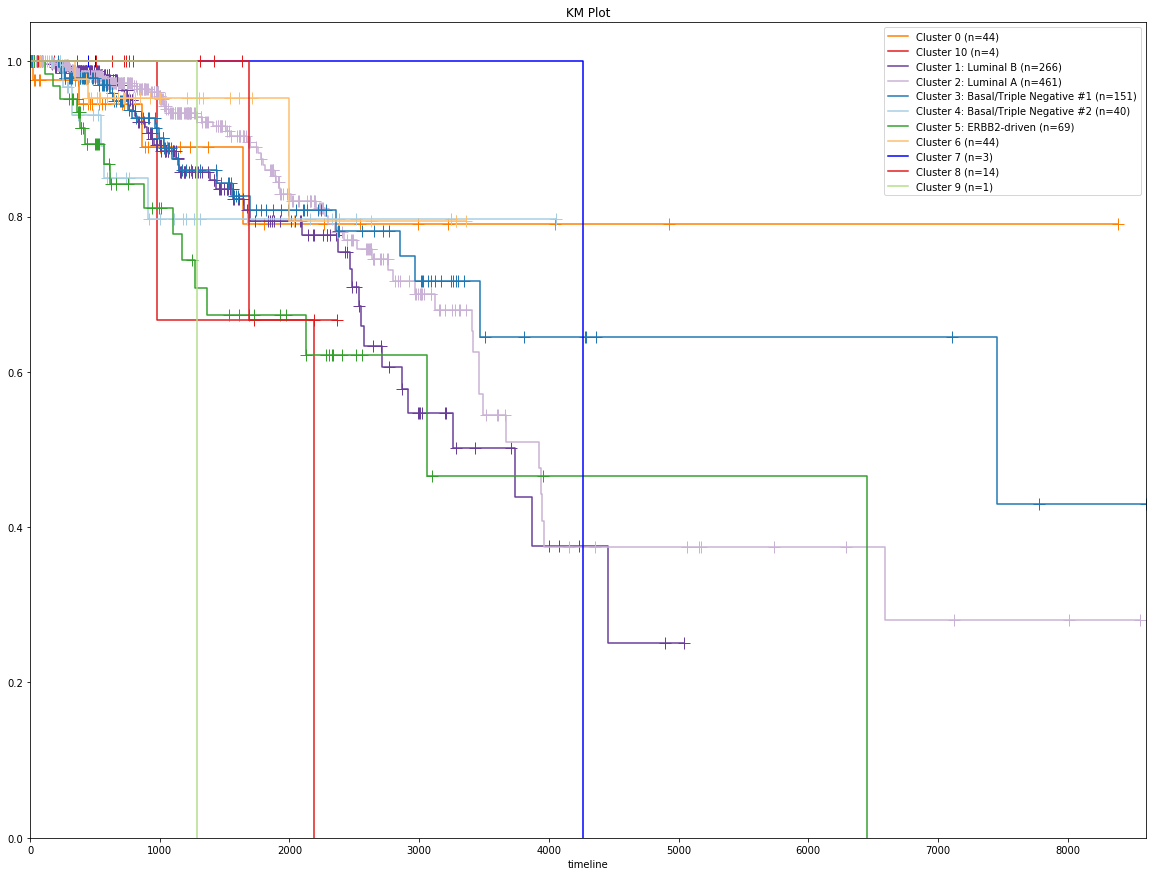

In [33]:
colormap_cluster_index_arr = np.array(dendrogram_dict['color_list'])[np.unique(cluter_assignments_arr, return_index=True)[1]]

colormap_cluster_index_dict = {cluster_relabel_dict[k]:colormap_cluster_index_arr[k] for k in range(0,len(colormap_cluster_index_arr))}

KM_plot_ax, KM_stats_df, KM_medians_df = KM_plot(cluster_assignments_series,vital_status_df,colormap_lst=colormap_cluster_index_dict)


## Kaplan-Meier Survival Statistics:

**Median Survival Times**: 
This is the timepoint at which the group's line crosses the 0.5 survival probability on the graph above.

In [34]:
KM_medians_df

,median_survival
sample_group,
Cluster 0,inf
Cluster 10,2192.0
Cluster 1: Luminal B,3736.0
Cluster 2: Luminal A,3926.0
Cluster 3: Basal/Triple Negative #1,7455.0
Cluster 4: Basal/Triple Negative #2,inf
Cluster 5: ERBB2-driven,3063.0
Cluster 6,inf
Cluster 7,4267.0


**Pairwise Statistics**: Are the survival curves of each cluster different than each other (pairwise)?

In [35]:
KM_stats_df

,cluster_A,cluster_A_median_survival,cluster_B,cluster_B_median_survival,p-value,FDR_corrected_p-value
33,Cluster 2: Luminal A,3926.0,Cluster 9,1286.0,0.001171,0.046108
29,Cluster 2: Luminal A,3926.0,Cluster 5: ERBB2-driven,3063.0,0.001677,0.046108
35,Cluster 3: Basal/Triple Negative #1,7455.0,Cluster 5: ERBB2-driven,3063.0,0.009277,0.127557
11,Cluster 10,2192.0,Cluster 2: Luminal A,3926.0,0.008067,0.127557
54,Cluster 8,inf,Cluster 9,1286.0,0.014306,0.131137
51,Cluster 6,inf,Cluster 9,1286.0,0.012675,0.131137
45,Cluster 5: ERBB2-driven,3063.0,Cluster 6,inf,0.042704,0.260967
39,Cluster 3: Basal/Triple Negative #1,7455.0,Cluster 9,1286.0,0.039633,0.260967
26,Cluster 1: Luminal B,3736.0,Cluster 9,1286.0,0.037466,0.260967
12,Cluster 10,2192.0,Cluster 3: Basal/Triple Negative #1,7455.0,0.052043,0.286237


After multiple hypothesis correction, ```Cluster 2: Luminal A``` and ```Cluster 5: ERBB2-driven``` were the only pair of meaningful clusters with a statistically significant difference (p = 0.046) in survival, meaning they had a reasonable amount of patients (Cluster 9 only had 1 patient and was more likely due to noise than biology).  The ERBB2 (HER2) cluster had a lower median survival time of 3063 days than the Luminal A cluster, which had 3926 days, replicating a clinically known fact <sup>1</sup>.

# References
  1. F. Blows et al. Subtyping of Breast Cancer by Immunohistochemistry to Investigate a Relationship between Subtype and Short and Long Term Survival: A Collaborative Analysis of Data for 10,159 Cases from 12 Studies. PLOS Medicine. 2010.  https://doi.org/10.1371/journal.pmed.1000279
  2. https://portal.gdc.cancer.gov/projects/TCGA-BRCA 
  3. Subramanian A, Tamayo P, et.al. Gene set enrichment analysis: A knowledge-based approach for interpreting genome-wide expression profiles. PNAS. 
  4. Pereira, B., Chin, SF., Rueda, O. et al. The somatic mutation profiles of 2,433 breast cancers refine their genomic and transcriptomic landscapes. Nat Commun 7, 11479 (2016). https://doi.org/10.1038/ncomms11479
  
Software package references are listed in **Step 0: Download Software and Data**.